### Faza 4

- zrobienie nowych kopii danych 
- zmienienie nazw kolumn
- usuniecie niepotrzebnych danych

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import shutil

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.12/site-packages/traitlets/traitlets.py", line 632, in get
    value = obj._trait_values[self.name]
            ~~~~~~~~~~~~~~~~~^^^^^^^^^^^
KeyError: '_control_lock'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.12/site-packages/zmq/eventloop/zmqstream.py", line 565, in _log_error
    f.result()
  File "/home/codespace/.local/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 340, in dispatch_control
    async with self._control_lock:
               ^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/traitlets/traitlets.py", line 687, in __get__
    return t.cast(G, self.get(obj, cls))  # the G should encode the Optional
                     ^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-

In [2]:
og = '../data/Gaming_Hours_vs_Performance_1000_Rows.csv'
cp = '../data/gaming_performance.csv'
shutil.copy(og, cp)

'../data/gaming_performance.csv'

In [3]:
df = pd.read_csv("../data/gaming_performance.csv")
df.head()

,User_ID,Age,Gender,Occupation,Game_Type,Daily_Gaming_Hours,Weekly_Gaming_Hours,Primary_Gaming_Time,Sleep_Hours,Stress_Level,Focus_Level,Academic_or_Work_Score,Productivity_Level,Performance_Impact
0,U0001,21,Male,Working Professional,Action,4.0,28.0,Morning,4.6,6,4,69,66,Negative
1,U0002,35,Female,Student,Sports,1.0,7.0,Night,5.4,2,7,67,72,Neutral
2,U0003,26,Male,Student,Puzzle,2.0,14.0,Morning,8.0,4,8,82,82,Positive
3,U0004,32,Male,Working Professional,Action,1.0,7.0,Night,4.9,7,7,71,66,Neutral
4,U0005,19,Male,Working Professional,Action,2.1,14.7,Morning,7.0,7,7,67,63,Neutral


#### Drop tables

In [4]:
df = df.drop(columns=['User_ID', 'Weekly_Gaming_Hours', 'Productivity_Level', 'Performance_Impact'])
df.head()

,Age,Gender,Occupation,Game_Type,Daily_Gaming_Hours,Primary_Gaming_Time,Sleep_Hours,Stress_Level,Focus_Level,Academic_or_Work_Score
0,21,Male,Working Professional,Action,4.0,Morning,4.6,6,4,69
1,35,Female,Student,Sports,1.0,Night,5.4,2,7,67
2,26,Male,Student,Puzzle,2.0,Morning,8.0,4,8,82
3,32,Male,Working Professional,Action,1.0,Night,4.9,7,7,71
4,19,Male,Working Professional,Action,2.1,Morning,7.0,7,7,67


#### Change columns

In [5]:
df_modify = df
df_modify = df_modify.rename(columns={"Primary_Gaming_Time": "Gaming_Time", "Daily_Gaming_Hours": "Gaming_Hours", "Academic_or_Work_Score": "Score"})
df_modify = pd.get_dummies(df_modify, columns=['Gender', 'Occupation'], drop_first=True, dtype=int)
df_modify.head(5)

,Age,Game_Type,Gaming_Hours,Gaming_Time,Sleep_Hours,Stress_Level,Focus_Level,Score,Gender_Male,Occupation_Working Professional
0,21,Action,4.0,Morning,4.6,6,4,69,1,1
1,35,Sports,1.0,Night,5.4,2,7,67,0,0
2,26,Puzzle,2.0,Morning,8.0,4,8,82,1,0
3,32,Action,1.0,Night,4.9,7,7,71,1,1
4,19,Action,2.1,Morning,7.0,7,7,67,1,1


In [6]:
df_modify.columns = df_modify.columns.str.lower()
df_modify = pd.get_dummies(df_modify, columns=["gaming_time", "game_type"],drop_first=True, dtype=int)
df_modify.head()

,age,gaming_hours,sleep_hours,stress_level,focus_level,score,gender_male,occupation_working professional,gaming_time_Morning,gaming_time_Night,game_type_Casual,game_type_Puzzle,game_type_Simulation,game_type_Sports,game_type_Strategy
0,21,4.0,4.6,6,4,69,1,1,1,0,0,0,0,0,0
1,35,1.0,5.4,2,7,67,0,0,0,1,0,0,0,1,0
2,26,2.0,8.0,4,8,82,1,0,1,0,0,1,0,0,0
3,32,1.0,4.9,7,7,71,1,1,0,1,0,0,0,0,0
4,19,2.1,7.0,7,7,67,1,1,1,0,0,0,0,0,0


##### Oznaczenia

- Gaming time
    - Morning 0 Night 0 to Evening
    - Morning 1 -> to morning
    - Night 1 -> to night
- Occupation
    - 1 -> Osoba pracujaca
    - 0 -> Student
- Gender_male
    - 1 -> True
    - 0 -> False -> Female
- game_type analogicznie
    - 1 -> Dana kategoria
    - Wszedzie 0 -> kategoria: Action

In [7]:
df = df_modify
df.head(5)

,age,gaming_hours,sleep_hours,stress_level,focus_level,score,gender_male,occupation_working professional,gaming_time_Morning,gaming_time_Night,game_type_Casual,game_type_Puzzle,game_type_Simulation,game_type_Sports,game_type_Strategy
0,21,4.0,4.6,6,4,69,1,1,1,0,0,0,0,0,0
1,35,1.0,5.4,2,7,67,0,0,0,1,0,0,0,1,0
2,26,2.0,8.0,4,8,82,1,0,1,0,0,1,0,0,0
3,32,1.0,4.9,7,7,71,1,1,0,1,0,0,0,0,0
4,19,2.1,7.0,7,7,67,1,1,1,0,0,0,0,0,0


### Podzial danych
Dane zostana podzielone w proporcjach 7:2:1 na zbiory treningowy, walidacyjny, testowy

In [19]:
from sklearn.model_selection import train_test_split

y = df.score
x = df.drop(columns='score')

#zbior testowy
x_train_full_set, x_test, y_train_full_set, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
#zbior walidacyjny
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full_set, y_train_full_set, test_size=0.222, random_state=42)

print(x_train.count())
print(x_valid.count())
print(x_test.count())

age                                700
gaming_hours                       700
sleep_hours                        700
stress_level                       700
focus_level                        700
gender_male                        700
occupation_working professional    700
gaming_time_Morning                700
gaming_time_Night                  700
game_type_Casual                   700
game_type_Puzzle                   700
game_type_Simulation               700
game_type_Sports                   700
game_type_Strategy                 700
dtype: int64
age                                200
gaming_hours                       200
sleep_hours                        200
stress_level                       200
focus_level                        200
gender_male                        200
occupation_working professional    200
gaming_time_Morning                200
gaming_time_Night                  200
game_type_Casual                   200
game_type_Puzzle                   200
game_type_Si

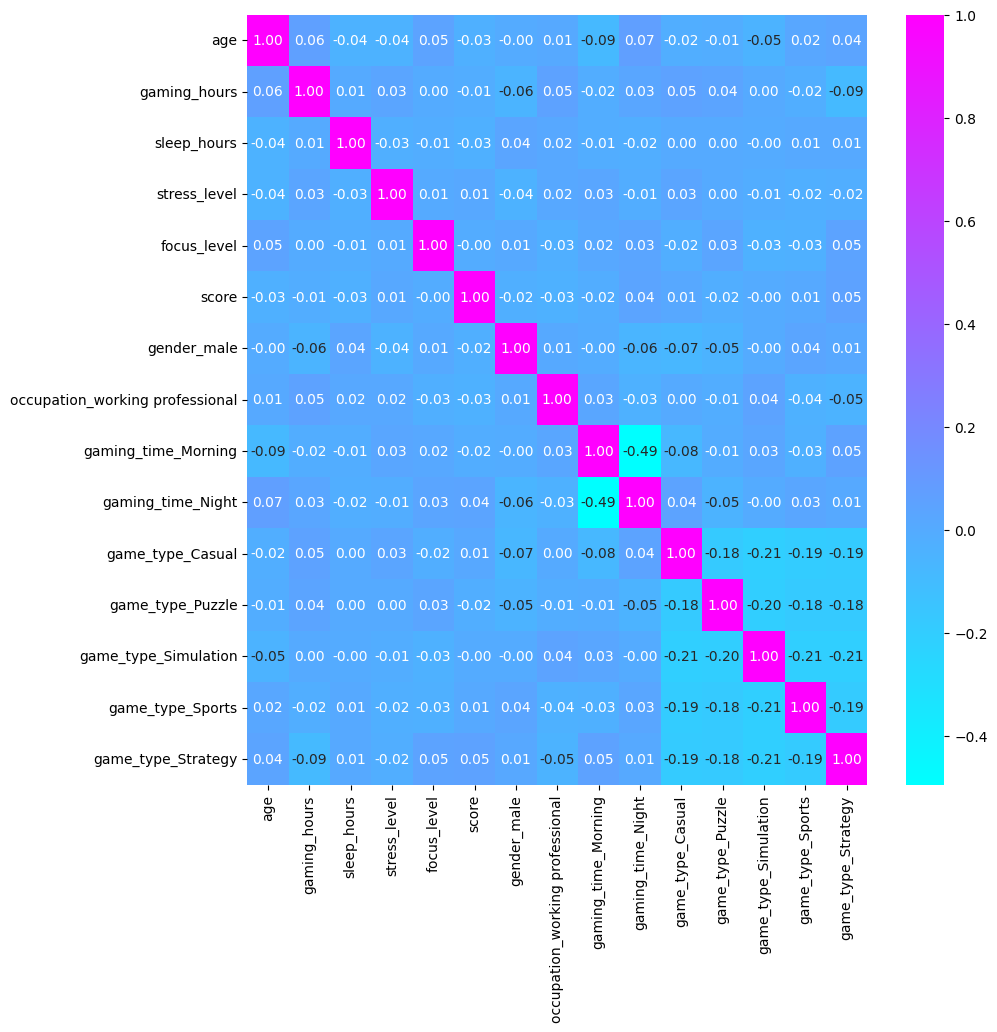

In [20]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sn.heatmap(data=df.corr(), annot=True, cmap="cool", fmt=".2f")

### Regresja linniowa

In [21]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
model = linear_model.LinearRegression()

In [24]:
print(x_train.shape)

(700, 14)


In [25]:
model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [26]:
y_pred = model.predict(x_test)

In [36]:
print("Coefficents: ", model.coef_)
print("Intercept: %.2f" % model.intercept_)
print('Mean square error: %.2f' % mean_squared_error(y_test, y_pred))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("R^2 score %.3f" % r2_score(y_test, y_pred))


Coefficents:  [-0.11227452 -0.1793432  -0.01484355  0.0576764  -0.07825915 -0.77909581
 -0.78585114  0.22720356  1.11146885  2.07299113  0.81536404  1.50025024
  1.65922315  2.25863173]
Intercept: 77.99
Mean square error: 131.46
MAE: 10.19
R^2 score 0.012


In [46]:
print(df.drop(columns="score").columns)

Index(['age', 'gaming_hours', 'sleep_hours', 'stress_level', 'focus_level',
       'gender_male', 'occupation_working professional', 'gaming_time_Morning',
       'gaming_time_Night', 'game_type_Casual', 'game_type_Puzzle',
       'game_type_Simulation', 'game_type_Sports', 'game_type_Strategy'],
      dtype='object')


<Axes: ylabel='score'>

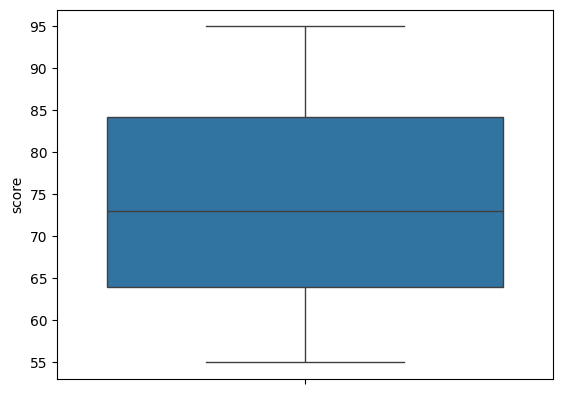

In [58]:
sn.boxplot(y_test)

<Axes: >

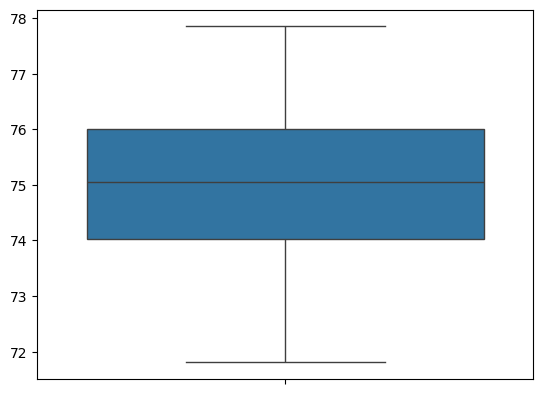

In [57]:
sn.boxplot(y_pred)

<Axes: xlabel='score'>

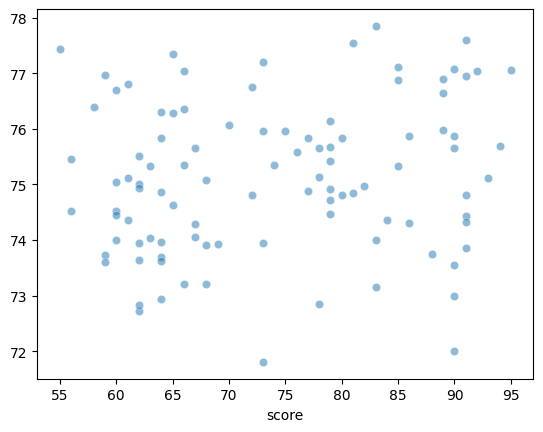

In [55]:
sn.scatterplot(x=y_test, y=y_pred, alpha=0.5)

In [61]:
waga_df = pd.DataFrame({"Cecha: ": df.drop(columns="score").columns, 'Waga': model.coef_})
waga_df.sort_values(by='Waga', ascending=False)

,Cecha:,Waga
13,game_type_Strategy,2.258632
9,game_type_Casual,2.072991
12,game_type_Sports,1.659223
11,game_type_Simulation,1.500250
8,gaming_time_Night,1.111469
10,game_type_Puzzle,0.815364
7,gaming_time_Morning,0.227204
3,stress_level,0.057676
2,sleep_hours,-0.014844
4,focus_level,-0.078259
